## LOAD THE LIBRARIES 

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

## VERSION OF LIBRARIES 

In [2]:
print('Pandas',pd.__version__)

Pandas 1.0.1


In [3]:
print('Numpy',np.__version__)

Numpy 1.18.1


In [4]:
print('matplotlib',matplotlib.__version__)

matplotlib 3.1.3


In [5]:
print('seaborn',sns.__version__)

seaborn 0.10.0


In [6]:
print('scikit-learn',sklearn.__version__)

scikit-learn 0.22.1


## LOAD THE DATA   

In [7]:
df=pd.read_csv(r'C:\Users\vamsh\Downloads\Mall_Customers.csv')

In [8]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


<b>Dropping the "CustomerID" column as it is of no use to us while analyzing.</b>

In [9]:
df=df.drop(["CustomerID"], axis = 1)

## CHECK FOR MISSING/NULL VALUES  

In [10]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Visualizing Age Frequency 

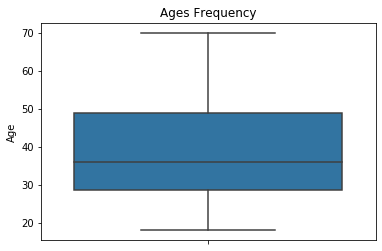

In [11]:
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.boxplot(y=df["Age"])
plt.show()

## Visualization and comparision of spending score , annual income

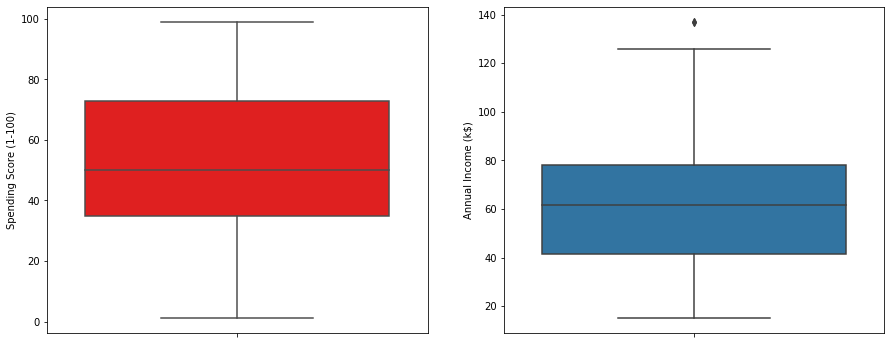

In [12]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Spending Score (1-100)"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=df["Annual Income (k$)"])
plt.show()

<b> The range of spending score is clearly more than the annual income range. </b>

## Distribution of Male and Female population 

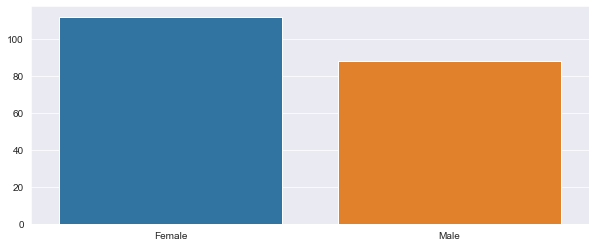

In [13]:
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

<b> The female population is more than the male population. </b>

## Distribution of Number of Customers in each age group 

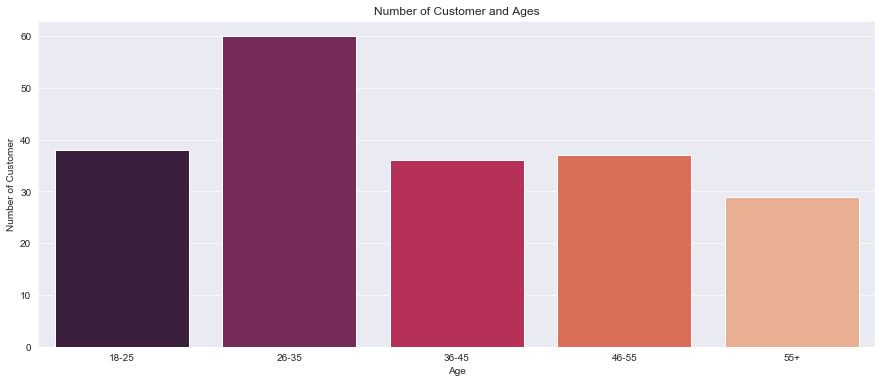

In [14]:
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

<b> The 26–35 age group outweighs every other age group. </b>

## Visualizing the Number of Customers according to their Spending Scores 

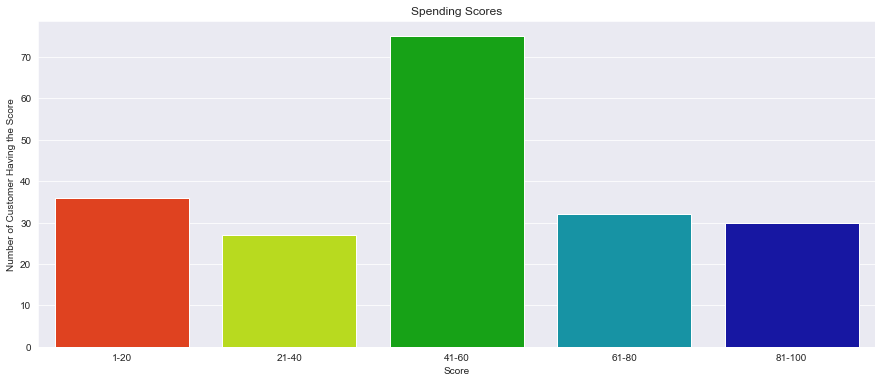

In [15]:
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

<b> The majority of the customers have spending score in the range 41–60. </b>

# Visualizing the Number of Customers according to their Annual Incomes

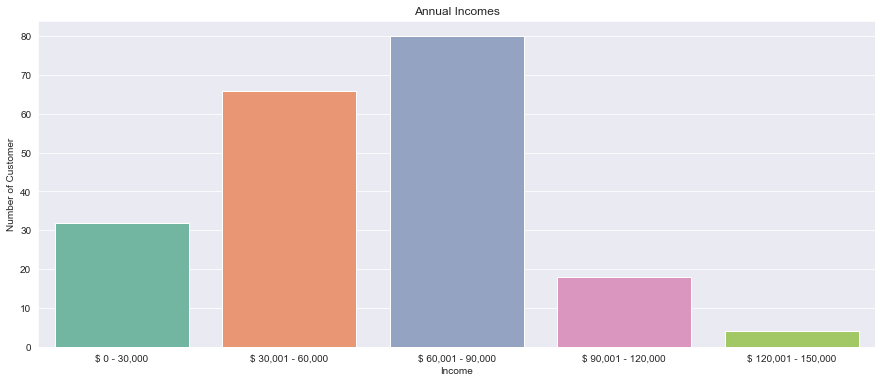

In [16]:
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

<b>The majority of the customers have annual income in the range 60000 and 90000. </b>

## LABEL ENCODING 

<b> Here , we are converting the categorical data into numerical data. </b>

In [17]:
def gender_to_numeric(x):
        if x=='Female': return 2
        if x=='Male':   return 1

In [18]:
df['Gender'] = df['Gender'].apply(gender_to_numeric)

In [19]:
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,2,20,16,6
3,2,23,16,77
4,2,31,17,40
5,2,22,17,76
6,2,35,18,6
7,2,23,18,94
8,1,64,19,3
9,2,30,19,72


<b> As we can see here , the categorical data has been changed into numerical data. </b>

# K-means Clustering 

In [20]:
from sklearn.cluster import KMeans

## Calculating the optimal K value 

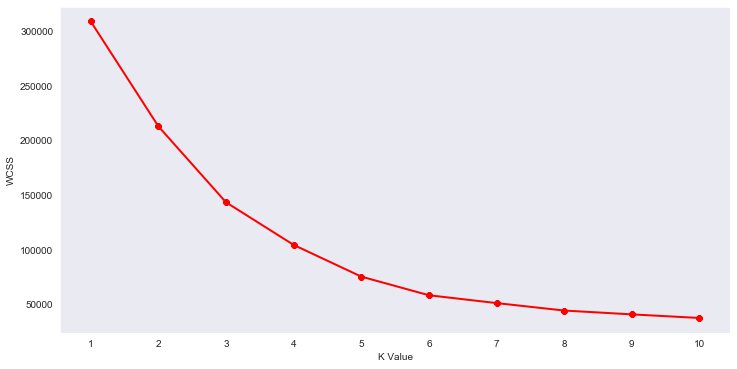

In [21]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

<b> Here , we use the Elbow method i.e, we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k, and choose the k for which WSS first starts to diminish. In the plot of WSS-versus k, this is visible as an elbow. </b>

<b> We compute K-Means clustering for different values of K by varying K from 1 to 10 clusters.For each K, calculate the total within-cluster sum of square (WCSS).Plot the curve of WCSS vs the number of clusters K.The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters. </b>

<b> We find the optimal K value to be 5 according to the above plot. </b>

In [22]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(df.iloc[:,1:])
df["label"] = clusters

<b> Here , we have used fit_predict() which helps us to compute cluster centers and predict cluster index for each sample and storing it in "clusters".We are creating a column called label in the dataset that will have "clusters" data so that it will be easy to identify which data corresponds to which cluster. </b>

In [23]:
from mpl_toolkits.mplot3d import Axes3D

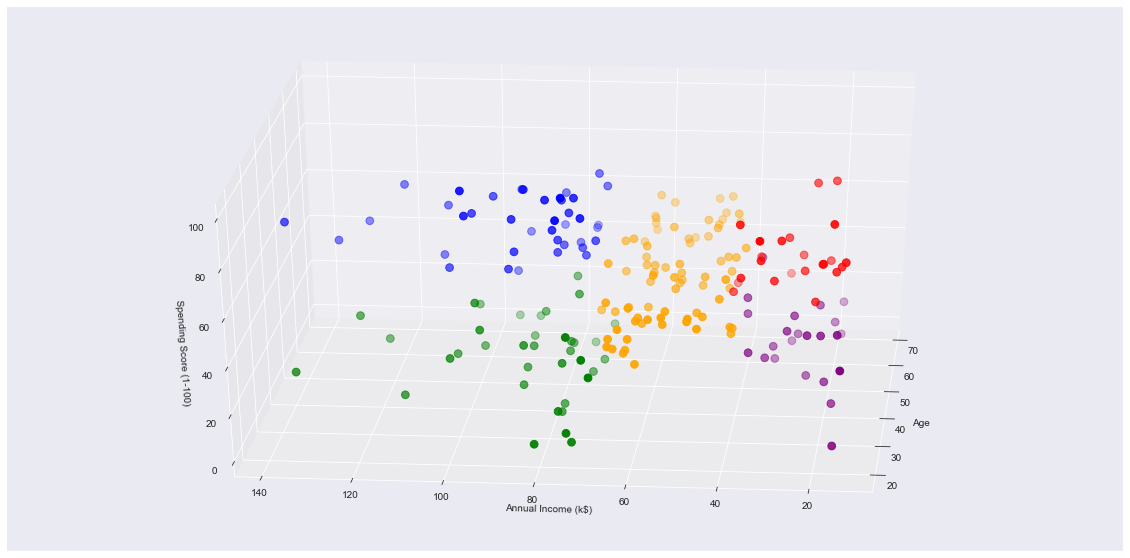

In [24]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

<b> Here , we have made a 3D plot to visualize the spending score of the customers with their annual income along with their age. </b>

## Conclusion  

<b> Through K-means algorithm , we can determine appropriate product pricing and target customers so that the sense can be given to marketing team and plan the strategy accordingly.We can identify unsatisfied customer needs.Companies can outperform the competition by developing uniquely appealing products and services.Revenue of the company will be increased. </b>